<h2> -Titanic - Machine Learning from Disaster Competition 

I have two similar datasets that include passenger information such as name, age, gender, socioeconomic class, etc. One data set is titled "train.csv" and the other is titled "test.csv".Train.csv will contain details of a subset of the passengers on board (891 to be exact) and most importantly, it will reveal whether or not they survived, also known as the "ground truth".The dataset "test.csv" contains similar information but does not reveal the "ground truth" for every passenger.

Done by **Islam Aljuneidi**

<h2>Table of contents

<ul>
    
<li><b>Introduction
    
<li><b>Research Question
    
<li><b>Data Wrangling
    
<li><b>Exploratory_Data Analysis
    
<li><b>Machine Learning
    
<li><b>Conclusion

<h3 id="intro">Introduction

In this section, we will briefly explain our dataset "Train Dataset", what it contains, and also what is each column?so our dataset contains 891 k rows and 12 columns so we explain once over what does it contains each column?

<ol>
<li>PassengerId. Unique identification of the passenger.
<li>survived. Survival (0 = no, 1 = yes).
<li>Pclass. Ticket category (1 = first, 2 = second, 3 = third).
<li>Name. Passenger's name. We need analysis before using it.
<li>sex. sex. The categorical variable
<li>age. Age in years.
<li>SibSp. The number of siblings/couples aboard the Titanic.
<li>Parch. # Parents/children aboard the Titanic.
<li>a ticket. ticket number. A big mess.
<li>Rent. Passenger fare.
<li>The Plane. cabin number. It must be analyzed.
<li>embarked. Departure port (C = Cherbourg, Q = Queenstown, S = Southampton).

<h3 id="Ques">Research Questions

-In this section we will ask ourselves what we need from this dataset I think that section is the most important step in data analysis steps because if you ask the right question you will get specific information and according to that  will help you to  make right decisions and efficient.

<ul>
<li>How many people have survived?
<li>Which class has the majority?
<li>Are there more men than women or vice versa?
<li>Which ages were dominant in this trip?
<li>are there many relatives in this trip?
<li>Which Embarked has the majority?

<h3>Import libraries

Now, Let's import some of the various commands and have access to our dataset.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import random
import time
%matplotlib inline
from numpy.polynomial.polynomial import polyfit
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
random.seed(40)

<h3>Data Wrangling

let's divide data wrangling to three main factors **Gathering Data,assess and cleaning Data**

<h4>Gathering Data

In [2]:
#import our dataset -the file is csv so we will use read_csv to read our file
df=pd.read_csv("train.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<h4>Assessing Data


at this section we dig into the data if they duplicated rows,missing value or rename columns

In [3]:
#size Dataseet what does it contains
df.shape

(891, 12)

In [4]:
#names of our columns
for x in list(df.columns[0:]):
    print(x)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [5]:
#check if there any missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<ul><li>there's missing values we will deal with them later

In [6]:
#check if there any duplicated values
df.duplicated().sum()

0

<ul><li>there isn't any duplicated values at our dataset

In [7]:
#Let's take a quick overview of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#describe our  Gategorical Data
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
#describe our  numerical Data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# number of non-null unique values for each feature
for i in df.columns:
    print(i,len(df[i].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


<h4>Data Cleaning


In [11]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
# split the name columns to title of names like MR,MRS
df["Title"]=df["Name"].str.split(expand=True)[1]

In [13]:
#drop the name column it's not useful anymore
df.drop(columns="Name",inplace=True)

In [14]:
#replace some title with others to get easier info when look into Age
def user(title):
    if title == "Mr.":
        return title
    elif title == "Miss.":
        return title
    elif title == "Mrs.":
        return title
    elif title == "Master.":
        return title
    else:
        return "others"
df["Title"]=df["Title"].apply(user)    

In [15]:
df["Title"].value_counts()


Mr.        502
Miss.      179
Mrs.       121
others      49
Master.     40
Name: Title, dtype: int64

In [16]:
df.groupby("Title")["Age"].mean()

Title
Master.     4.574167
Miss.      21.846154
Mr.        32.389610
Mrs.       36.182692
others     36.597826
Name: Age, dtype: float64

In [17]:
#replace the null values with the average of each title
df.loc[(df["Age"].isnull()) & (df["Title"]=="Master."), 'Age'] = 4.57
df.loc[(df["Age"].isnull()) & (df["Title"]=="Miss."), 'Age'] = 21.84
df.loc[(df["Age"].isnull()) & (df["Title"]=="Mr."), 'Age'] = 32.38
df.loc[(df["Age"].isnull()) & (df["Title"]=="Mrs."), 'Age'] = 36.18
df.loc[(df["Age"].isnull()) & (df["Title"]=="others"), 'Age'] = 36.6

In [18]:
#drop cabin column not useful
df.drop(columns="Cabin",inplace=True)

In [19]:
#fill missing value in Embarked column
df["Embarked"]=df["Embarked"].fillna("S")

In [20]:
# let's check if there any missing value or not
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

<h3 id="eda">Exploratory_Data Analysis


<ul><li>Explore our dataset if there are any outliers or find out any value that we didn't detect when we do any numerical computation

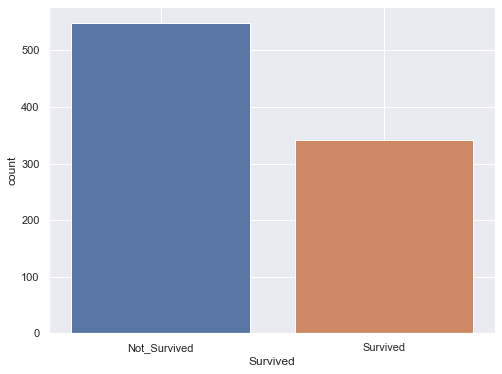

In [21]:
plt.figure(figsize=[8,6])
sns.set_theme(style="darkgrid")
sns.countplot(data=df,x="Survived")
plt.xticks([0,1],["Not_Survived","Survived"])
plt.grid(True)
plt.show()

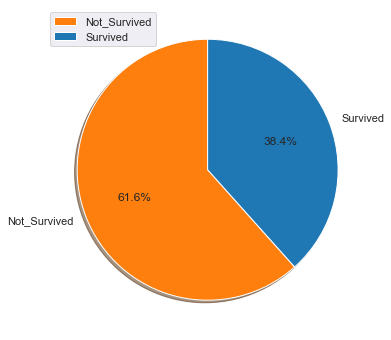

In [22]:
plt.figure(figsize=[8,6])
explode = (0,0)
labels =["Not_Survived","Survived"]
colors = ( "#FF7F0E", "#1F77B4")
plt.pie(df["Survived"].value_counts(), autopct='%1.1f%%',labels=labels,explode=explode,shadow=True, startangle=90,colors=colors)
plt.legend()
plt.show()

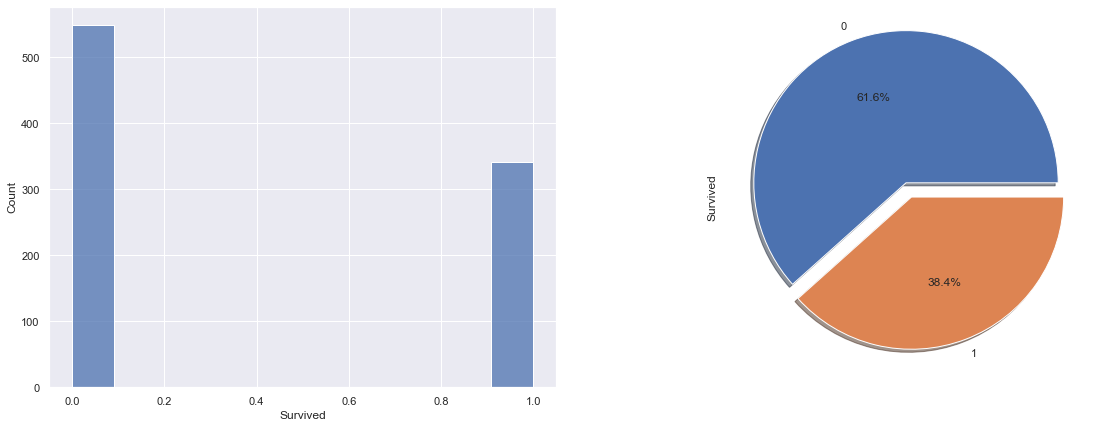

In [23]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="Survived", ax=ax1[0])
df["Survived"].value_counts().plot.pie(shadow=True, autopct="%1.1f%%", explode=[0.1, 0], ax=ax1[1])

plt.show()

**the people who not survived more than the people who survived**

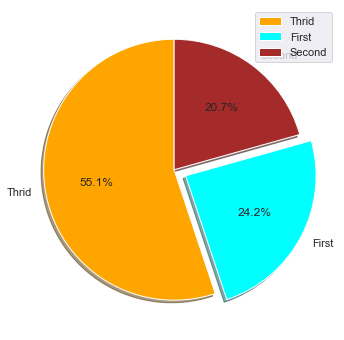

In [24]:
plt.figure(figsize=[8,6])
explode = (0, 0.1, 0)
labels =['Thrid', 'First','Second']
colors = ( "orange", "cyan", "brown")
plt.pie(df["Pclass"].value_counts(), autopct='%1.1f%%',labels=labels,explode=explode,shadow=True, startangle=90,colors=colors)
plt.legend()
plt.show()

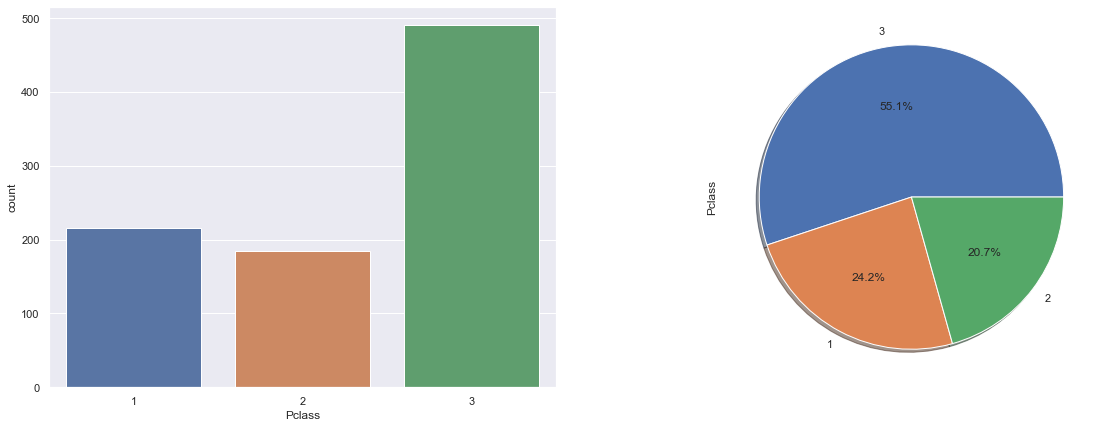

In [25]:
fig2, ax2 = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=df, x="Pclass", ax=ax2[0])
df["Pclass"].value_counts().plot.pie(shadow=True, autopct="%1.1f%%", ax=ax2[1])

plt.show()

**Thrid calss has the majority**

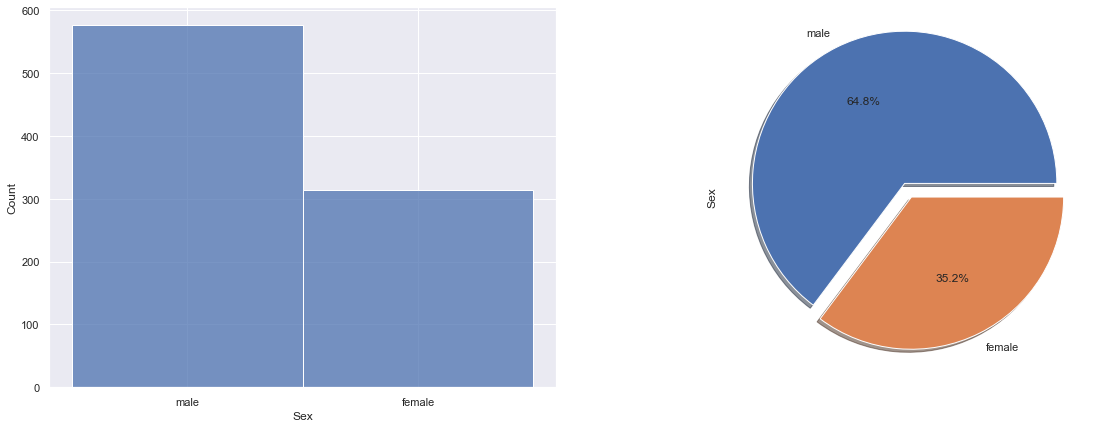

In [26]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="Sex", ax=ax1[0])
df["Sex"].value_counts().plot.pie(shadow=True, autopct="%1.1f%%", explode=[0.1, 0], ax=ax1[1])

plt.show()

**male are more than female in this trip**

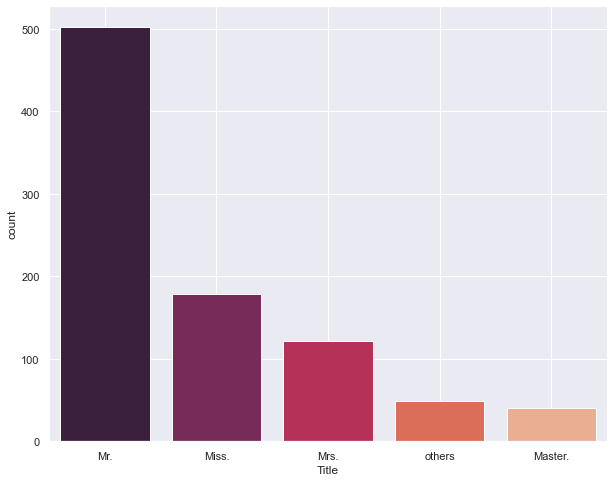

In [27]:
plt.figure(figsize=[10,8])
sns.countplot(data=df,x="Title",order=df["Title"].value_counts().index,palette="rocket")
plt.grid(True)
plt.show()

**It is natural that more men than women on the trip, those who have a title MR. are the majority**

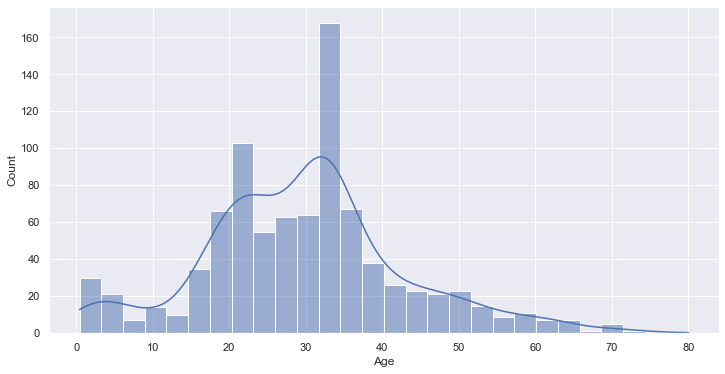

In [28]:
plt.figure(figsize=[12,6])
ax=sns.histplot(data=df,x="Age",kde=True)
plt.grid(True)
plt.show()

**person with 35 years old has majority in this trip**

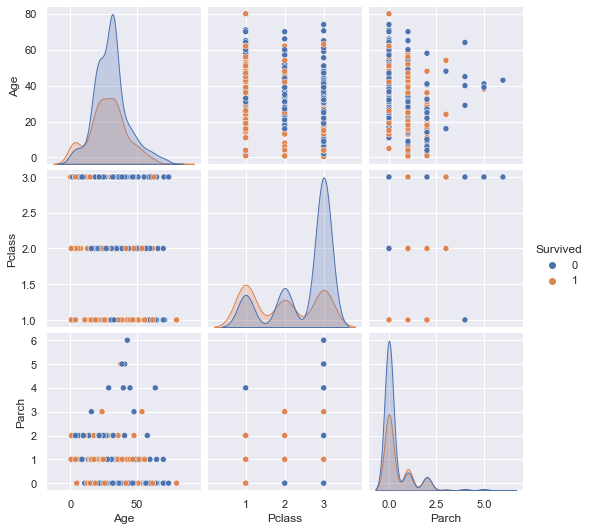

In [29]:
df_2=df[["Age","Survived","Pclass","Parch"]]
sns.pairplot(data=df_2,hue="Survived");

In [30]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042589,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.088208,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.342623,0.083081,0.018443,-0.549500
Age,0.042589,-0.088208,-0.342623,1.000000,-0.267667,-0.197009,0.090776
SibSp,-0.057527,-0.035322,0.083081,-0.267667,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.197009,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.090776,0.159651,0.216225,1.000000


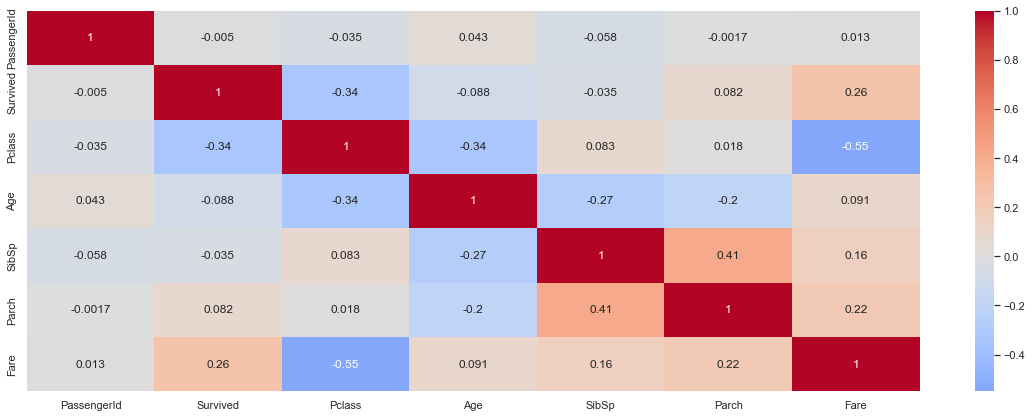

In [31]:
fig, ax = plt.subplots(figsize=(20, 7))
dataplot = sns.heatmap(data=corr, annot=True,cmap="coolwarm",center=0, ax=ax)
plt.show()

In [32]:
df.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs.


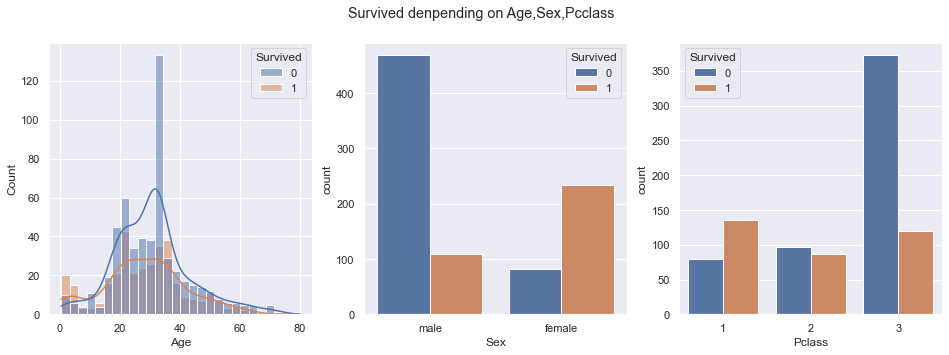

In [33]:
fig,axes=plt.subplots(1,3,figsize=[16,5])
fig.suptitle('Survived denpending on Age,Sex,Pcclass')
sns.histplot(ax=axes[0],x="Age",hue="Survived",data=df,kde=True)
sns.countplot(ax=axes[1],x="Sex",hue="Survived",data=df)
sns.countplot(ax=axes[2],x="Pclass",hue="Survived",data=df)
plt.show()

<ul>
<li>We note that the majority of survivors are female
<li>between 20 years old and 40 years old They were the most survivors
<li>We note that the passengers in the first class are the most survivors in the ship accident. It may be that it was safer

In [34]:
df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,S,Mr.


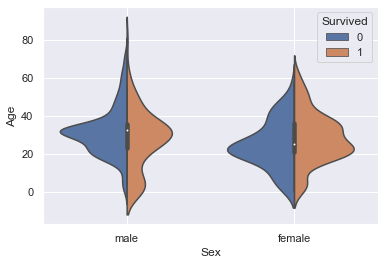

In [35]:
#he number of siblings
sns.violinplot(data=df, x="Sex", y="Age", hue="Survived", split=True)
plt.grid(True)
plt.show()


Children survival rate for both gender seems to be good, even though the survival rate for boys is higher. For old people (Age > 60), the survival rate for old men tends to be lower, in contrast to the survival rate for old women which tends to be higher.



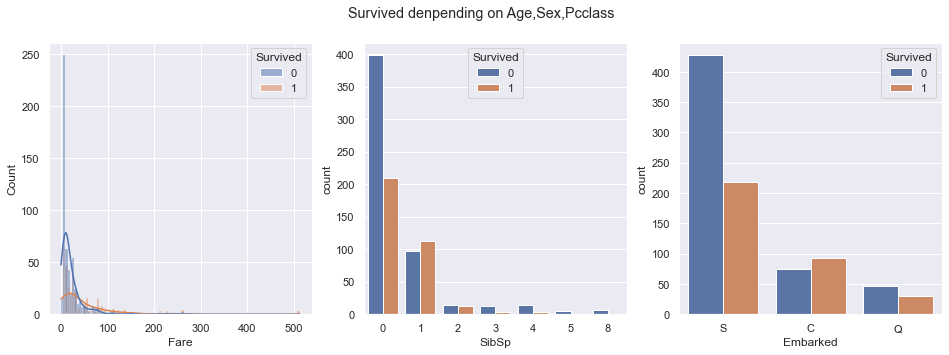

In [36]:
fig,axes=plt.subplots(1,3,figsize=[16,5])
fig.suptitle('Survived denpending on Age,Sex,Pcclass')
sns.histplot(ax=axes[0],x="Fare",hue="Survived",data=df,kde=True)
sns.countplot(ax=axes[1],x="SibSp",hue="Survived",data=df)
sns.countplot(ax=axes[2],x="Embarked",hue="Survived",data=df)
plt.show()

<h4>Conclusion What we got

<ol>
<li>Apparently, passengers traveling with small numbers of the family have a higher chance of survival. Also, a large number of children (age greater than or equal 10) survived this tragedy,while passengers over their age tend not to survive.
<li>We can also see that the number of female survivors was much greater than the number of males (the first symbol of women and children).
<li>The passengers from Port C seemed to be more fortunate as many of them survived.
<li>P-class also plays a big role here because most passengers of P-class 1 manage to survive or have a higher priority to be rescued, while passengers of P-class 3 tend not to survive.

<h3 id="Ques">Logistics regression

In [37]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.


In [38]:
#drop unuseful column 
df.drop(columns=["PassengerId","Ticket","Title"],inplace=True)

In [39]:
df[["female","male"]]=pd.get_dummies(df["Sex"])
df[["C","Q","S"]]=pd.get_dummies(df["Embarked"])

In [40]:
#drop sex and Embarked columns we will not use them again
df.drop(columns=["Sex","Embarked"],inplace=True)

In [41]:
#features that usues to prdecit
X=df.drop(columns=["Survived"])
#
Y=df["Survived"]
X.head(2)

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=42)

#### FOLLOW FOUR STEPS

<ol>
<li>choose Model
<li>fit Model
<li>predict Model
<li>Evaluate Model

In [43]:
from sklearn.preprocessing import StandardScaler#scaling the features
scaler= StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)


0.8134328358208955

In [46]:
confusion_matrix(y_test, y_pred)


array([[137,  20],
       [ 30,  81]], dtype=int64)

In [47]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [48]:
test_df = pd.read_csv('test.csv')
test_df.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [49]:
test_df.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
# split the name columns to title of names like MR,MRS
test_df["Title"]=test_df["Name"].str.split(expand=True)[1]
#drop the name column it's not useful anymore
test_df.drop(columns="Name",inplace=True)

In [51]:
#replace some title with others to get easier info when look into Age
def user(title):
    if title == "Mr.":
        return title
    elif title == "Miss.":
        return title
    elif title == "Mrs.":
        return title
    elif title == "Master.":
        return title
    else:
        return "others"
test_df["Title"]=test_df["Title"].apply(user) 

In [52]:
test_df["Title"].value_counts()


Mr.        234
Miss.       77
Mrs.        70
Master.     19
others      18
Name: Title, dtype: int64

In [53]:
test_df.groupby("Title")["Age"].mean()

Title
Master.     7.150625
Miss.      21.644286
Mr.        32.050847
Mrs.       39.050000
others     34.781250
Name: Age, dtype: float64

In [54]:
#replace the null values with the average of each title
test_df.loc[(test_df["Age"].isnull()) & (test_df["Title"]=="Master."), 'Age'] = 7.15
test_df.loc[(test_df["Age"].isnull()) & (test_df["Title"]=="Miss."), 'Age'] = 21.84
test_df.loc[(test_df["Age"].isnull()) & (test_df["Title"]=="Mr."), 'Age'] = 32.38
test_df.loc[(test_df["Age"].isnull()) & (test_df["Title"]=="Mrs."), 'Age'] = 39
test_df.loc[(test_df["Age"].isnull()) & (test_df["Title"]=="others"), 'Age'] = 34.8

In [55]:
#drop cabin column not useful
test_df.drop(columns="Cabin",inplace=True)

In [56]:
test_df.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,Q,Mr.
1,893,3,female,47.0,1,0,363272,7.0000,S,Mrs.


In [57]:
test_df[["female","male"]]=pd.get_dummies(test_df["Sex"])
test_df[["C","Q","S"]]=pd.get_dummies(test_df["Embarked"])
#drop sex and Embarked columns we will not use them again
test_df.drop(columns=["Sex","Embarked","Ticket","Title"],inplace=True)
test_df.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1


In [58]:
X= df[["Pclass","C","Q","S","SibSp","Age","female","male"]]
y= df["Survived"]
test= test_df[["Pclass","C","Q","S","SibSp","Age","female","male"]]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [61]:
grid_params = {'n_estimators': [90,100, 110, 120], 'max_depth': [2,3,5,10,15] }


In [62]:
model_2 = RandomForestClassifier(n_estimators=120, max_depth=5)


In [63]:
model_2.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=120)

In [64]:
y_pred = model_2.predict(X_test)


In [65]:
accuracy_score(y_test, y_pred)


0.8134328358208955

In [66]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.80      0.92      0.85       157
           1       0.85      0.67      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



In [67]:
prediction = model_2.predict(test)


In [68]:
submission = pd.read_csv('gender_submission.csv')


In [69]:
submission['Survived'] = prediction


In [70]:
submission.to_csv('submission.csv', index=False)


In [71]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
